In [2]:
import pandas as pd                               # For dataframes
import matplotlib.pyplot as plt                   # For plotting data
import seaborn as sns                             # For plotting data
from sklearn.cluster import KMeans                # For k-Means
from sklearn.model_selection import GridSearchCV  # For grid search
from sklearn.metrics import silhouette_score      # For metrics and scores
from sklearn.preprocessing import StandardScaler  # For standardizing data
import numpy as np

%matplotlib inline

In [4]:
from sklearn.datasets import make_blobs

data = make_blobs(n_samples=200, 
                  n_features=2, centers=4, 
                  cluster_std=1.8, random_state=101)

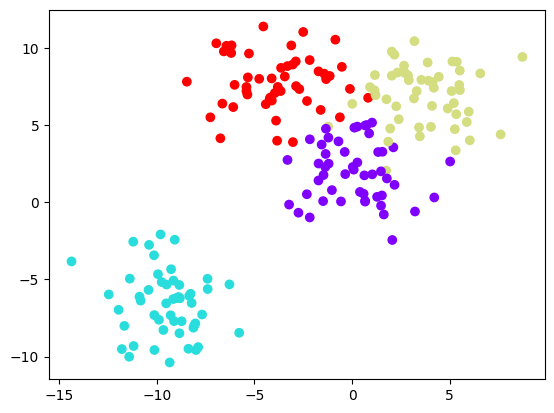

In [5]:
plt.scatter(data[0][:,0], data[0][:,1], c=data[1], cmap='rainbow')

In [6]:
kmeans = KMeans(n_clusters=4)

In [7]:
kmeans.fit(data[0])

/Users/williamoconnell/Documents/pandas_jupyter/setup-instruction-venv/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=4)

In [8]:
kmeans.cluster_centers_

array([[ 3.71749226,  7.01388735],
       [-9.46941837, -6.56081545],
       [-4.13591321,  7.95389851],
       [-0.0123077 ,  2.13407664]])

In [9]:
kmeans.labels_

array([2, 0, 3, 0, 0, 1, 0, 3, 0, 3, 2, 3, 0, 0, 2, 3, 0, 3, 1, 2, 1, 3,
       3, 1, 2, 1, 1, 3, 0, 0, 2, 1, 0, 3, 3, 2, 1, 1, 1, 3, 1, 2, 2, 2,
       3, 0, 2, 3, 1, 3, 3, 2, 0, 3, 1, 2, 3, 3, 2, 0, 1, 0, 1, 2, 0, 3,
       1, 0, 0, 1, 0, 3, 1, 3, 1, 0, 0, 3, 2, 3, 3, 1, 0, 1, 3, 3, 3, 2,
       3, 1, 1, 1, 1, 3, 3, 1, 0, 2, 1, 0, 3, 1, 3, 3, 0, 3, 1, 0, 1, 1,
       0, 2, 2, 0, 1, 0, 2, 2, 0, 2, 3, 2, 3, 2, 3, 0, 2, 3, 1, 2, 2, 2,
       3, 1, 1, 2, 0, 2, 0, 3, 1, 0, 1, 2, 2, 0, 3, 1, 2, 2, 2, 2, 3, 0,
       3, 2, 0, 0, 0, 3, 0, 3, 3, 2, 1, 2, 3, 0, 2, 3, 0, 3, 2, 0, 3, 2,
       0, 0, 1, 0, 2, 1, 1, 2, 1, 1, 1, 1, 1, 3, 1, 0, 0, 2, 1, 3, 0, 0,
       1, 3], dtype=int32)

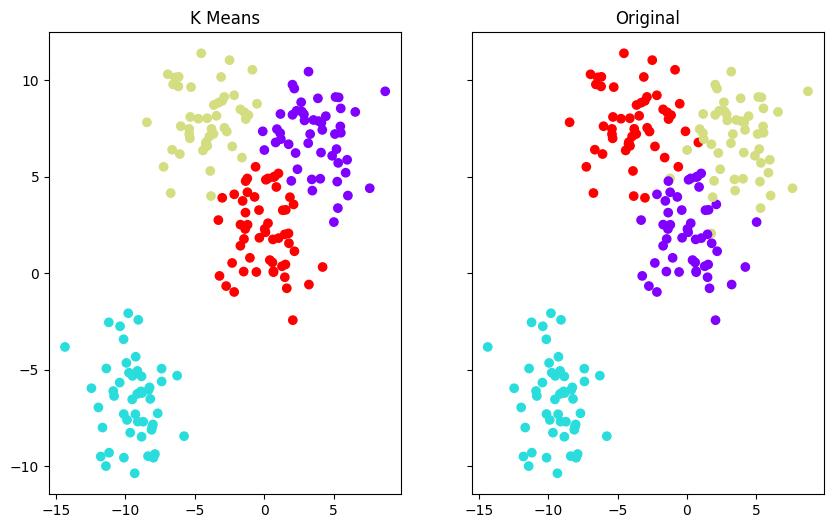

In [10]:
fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(10,6))

ax1.set_title('K Means')
ax1.scatter(data[0][:,0], data[0][:,1], c=kmeans.labels_, cmap='rainbow')

ax2.set_title('Original')
ax2.scatter(data[0][:,0], data[0][:,1], c=data[1], cmap='rainbow')

# Here begins the Iris challenge

In [ ]:
df = pd.read_csv('../datasets/iris.csv')

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [12]:
iris_species = df['species']

In [13]:
df = df.drop('species', axis=1)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


<Axes: >

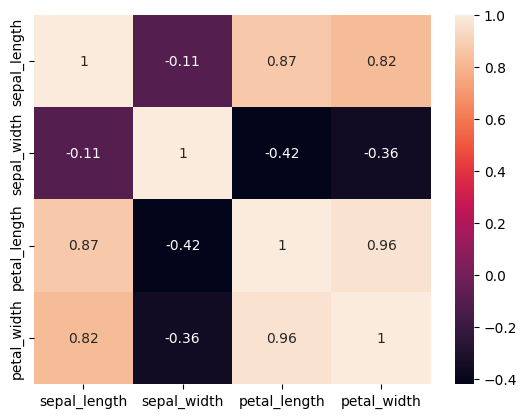

In [15]:
correl=df.corr()
sns.heatmap(correl,annot=True)

We observe that bigger values are represented with light color. This observation will always be the same for the heatmap. Dark values will always be less than light-colored values.

In [16]:
# Sets up the kMeans object
km = KMeans(
    n_clusters=3,
    random_state=1,
    init='k-means++',
    n_init=10)

# Fits the model to the data
km.fit(df['sepal_length'])

# Displays the parameters of the fitted model
km.get_params()

ValueError: Expected 2D array, got 1D array instead:
array=[5.1 4.9 4.7 4.6 5.  5.4 4.6 5.  4.4 4.9 5.4 4.8 4.8 4.3 5.8 5.7 5.4 5.1
 5.7 5.1 5.4 5.1 4.6 5.1 4.8 5.  5.  5.2 5.2 4.7 4.8 5.4 5.2 5.5 4.9 5.
 5.5 4.9 4.4 5.1 5.  4.5 4.4 5.  5.1 4.8 5.1 4.6 5.3 5.  7.  6.4 6.9 5.5
 6.5 5.7 6.3 4.9 6.6 5.2 5.  5.9 6.  6.1 5.6 6.7 5.6 5.8 6.2 5.6 5.9 6.1
 6.3 6.1 6.4 6.6 6.8 6.7 6.  5.7 5.5 5.5 5.8 6.  5.4 6.  6.7 6.3 5.6 5.5
 5.5 6.1 5.8 5.  5.6 5.7 5.7 6.2 5.1 5.7 6.3 5.8 7.1 6.3 6.5 7.6 4.9 7.3
 6.7 7.2 6.5 6.4 6.8 5.7 5.8 6.4 6.5 7.7 7.7 6.  6.9 5.6 7.7 6.3 6.7 7.2
 6.2 6.1 6.4 7.2 7.4 7.9 6.4 6.3 6.1 7.7 6.3 6.4 6.  6.9 6.7 6.9 5.8 6.8
 6.7 6.7 6.3 6.5 6.2 5.9].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [ ]:
x = df.iloc[:, [0, 1, 2, 3]].values


[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.1 1.5 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

In [ ]:
#Finding the optimum number of clusters for k-means classification
from sklearn.cluster import KMeans
wcss = []

for i in range(1, 11):
    km = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    km.fit(x)
    wcss.append(km.inertia_)

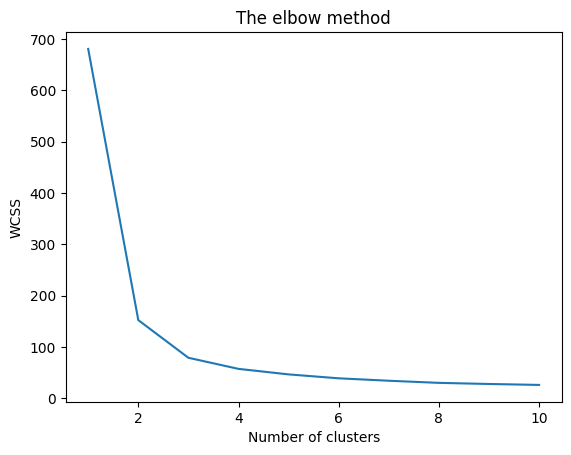

In [ ]:
plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') #within cluster sum of squares
plt.show()

In [ ]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)

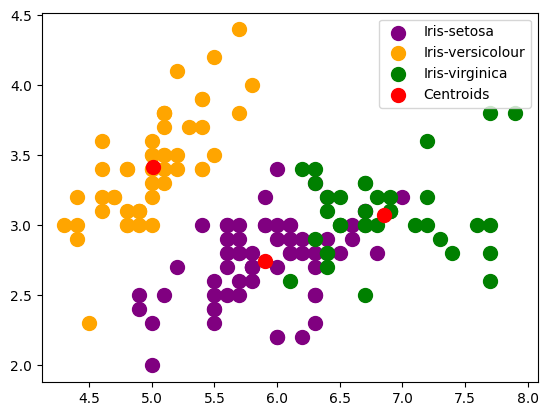

In [ ]:
#Visualising the clusters
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 100, c = 'purple', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 100, c = 'orange', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Iris-virginica')

#Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = 'red', label = 'Centroids')

plt.legend()

In [ ]:
# Sets up the custom scorer
def s2(estimator,X):
    return silhouette_score(X, estimator.predict(X))

# List of values for the parameter `n_clusters`
param = range(2,10)

# KMeans object
km = KMeans(random_state=0, init='k-means++')

# Sets up GridSearchCV object and stores in grid variable
grid = GridSearchCV(
    km,
    {'n_clusters': param},
    scoring=s2,
    cv=2)

# Fits the grid object to data
grid.fit(df)

# Accesses the optimum model
best_km = grid.best_estimator_

# Displays the optimum model
best_km.get_params()

/Users/williamoconnell/Documents/pandas_jupyter/setup-instruction-venv/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/williamoconnell/Documents/pandas_jupyter/setup-instruction-venv/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/williamoconnell/Documents/pandas_jupyter/setup-instruction-venv/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/williamoconnell/Documents/pandas_jupyter/setup-instruction-venv/lib/python3.11/site-packages/sklearn/

{'algorithm': 'lloyd',
 'copy_x': True,
 'init': 'k-means++',
 'max_iter': 300,
 'n_clusters': 4,
 'n_init': 'warn',
 'random_state': 0,
 'tol': 0.0001,
 'verbose': 0}

Text(0, 0.5, 'Silhouette Score')

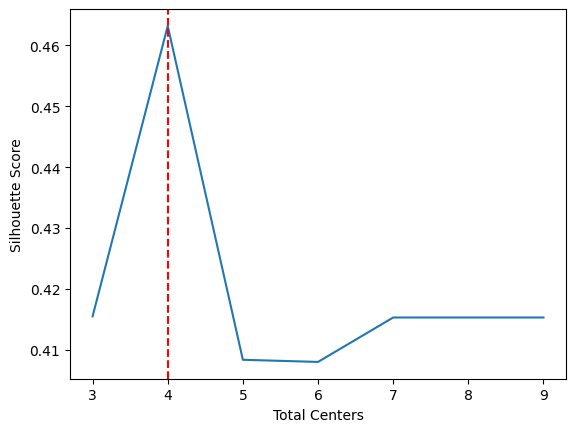

In [ ]:
# Plot mean_test_scores vs. n_clusters
plt.plot(
    param,
    grid.cv_results_['mean_test_score'])

# Draw a vertical line, where the best model is
plt.axvline(
    x=best_km.n_clusters, 
    color='red',
    ls='--')

# Adds labels to the plot
plt.xlabel('Total Centers')
plt.ylabel('Silhouette Score')

In [ ]:
df.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width'], dtype='object')

one plot with sepal width & length

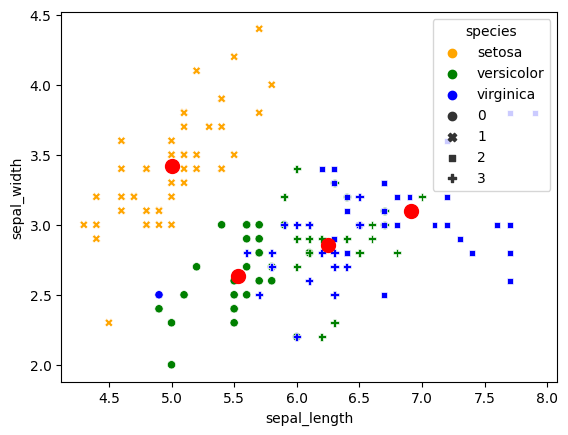

In [ ]:
# Creates a scatter plot
sns.scatterplot(
    x='sepal_length', 
    y='sepal_width',
    data=df, 
    hue = iris_species,
    style=best_km.labels_,
    palette=['orange', 'green', 'blue'])

# Adds cluster centers to the same plot
plt.scatter(
    best_km.cluster_centers_[:, 0],
    best_km.cluster_centers_[:, 1],
    marker='o',
    s=100,
    c='red')

one plot with petal width and height

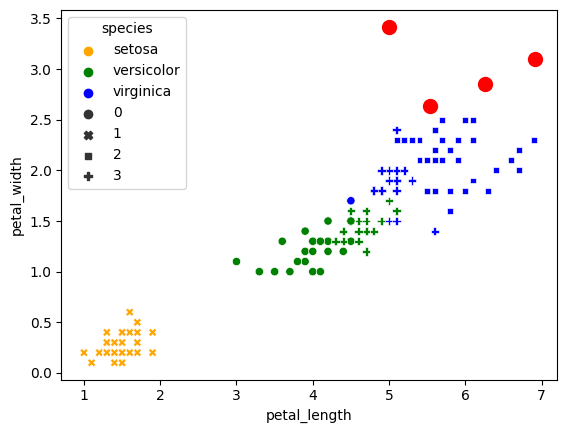

In [ ]:
# Creates a scatter plot
sns.scatterplot(
    x='petal_length', 
    y='petal_width',
    data=df, 
    hue = iris_species,
    style=best_km.labels_,
    palette=['orange', 'green', 'blue'])

# Adds cluster centers to the same plot
plt.scatter(
    best_km.cluster_centers_[:, 0],
    best_km.cluster_centers_[:, 1],
    marker='o',
    s=100,
    c='red')

In [ ]:
km = KMeans(n_clusters=4)
y_predicted = km.fit_predict(df)
y_predicted

/Users/williamoconnell/Documents/pandas_jupyter/setup-instruction-venv/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 3, 3, 3, 0, 3, 0, 3, 0, 3, 0, 0, 0, 0, 3, 0, 3,
       3, 0, 3, 0, 3, 0, 3, 3, 3, 3, 3, 3, 3, 0, 0, 0, 0, 3, 0, 3, 3, 3,
       0, 0, 0, 3, 0, 0, 0, 0, 0, 3, 0, 0, 2, 3, 2, 2, 2, 2, 0, 2, 2, 2,
       3, 3, 2, 3, 3, 2, 2, 2, 2, 3, 2, 3, 2, 3, 2, 2, 3, 3, 2, 2, 2, 2,
       2, 3, 3, 2, 2, 2, 3, 2, 2, 2, 3, 2, 2, 2, 3, 3, 2, 3], dtype=int32)

In [ ]:
df['cluster'] = y_predicted

In [ ]:
df

,sepal_length,sepal_width,petal_length,petal_width,cluster
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,3
147,6.5,3.0,5.2,2.0,3
148,6.2,3.4,5.4,2.3,2
